In [8]:
pip install gradio!

clean_text    4
category      7
dtype: int64
category
 1.0    72249
 0.0    55211
-1.0    35509
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
               precision    recall  f1-score   support

        -1.0       0.91      0.82      0.86      7152
         0.0       0.91      0.98      0.94     11067
         1.0       0.94      0.93      0.93     14375

    accuracy                           0.92     32594
   macro avg       0.92      0.91      0.91     32594
weighted avg       0.92      0.92      0.92     32594

Confusion Matrix:
 [[ 5878   555   719]
 [   91 10826   150]
 [  491   502 13382]]
Accuracy Score: 0.923053322697429


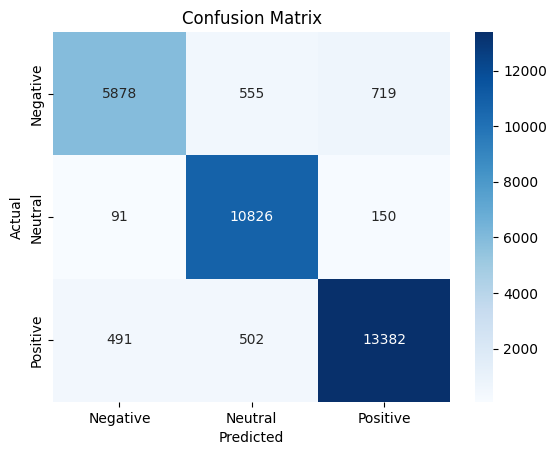

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://c1829ae5c98a69be32.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [9]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import gradio as gr

# Load the dataset
from google.colab import files

# Assuming the file is named 'sentiment_dataset.csv'
df = pd.read_csv('/content/Twitter_Data.csv')

# Display the first few rows of the dataframe
df.head()

# Check for missing values
print(df.isnull().sum())

# Remove missing values
df.dropna(inplace=True)

# Display class distribution
print(df['category'].value_counts())

# Split the data into features and labels
X = df['clean_text']
y = df['category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Fit and transform the training data
X_train_tfidf = tfidf.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf.transform(X_test)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train_tfidf, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test_tfidf)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Print accuracy score
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Define the prediction function for Gradio
def predict_sentiment(text):
    # Transform the input text
    text_tfidf = tfidf.transform([text])
    # Predict the sentiment
    sentiment = model.predict(text_tfidf)[0]
    # Map the sentiment to a label
    sentiment_map = {-1: 'Negative', 0: 'Neutral', 1: 'Positive'}
    return sentiment_map[sentiment]

# Create a Gradio interface
iface = gr.Interface(fn=predict_sentiment, inputs="text", outputs="label",
                     title="Sentiment Analysis", description="Enter a tweet to predict its sentiment.")

# Launch the interface
iface.launch()
